In [174]:
import pandas as pd
from pprint import pprint as pp
import matplotlib.pyplot as plt
import math as m
from datetime import datetime, timedelta

In [2]:
raw_data = pd.read_csv("data/California_Fire_Incidents.csv")
raw_data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [3]:
# Output names of all columns
for name in raw_data.columns:
    print(name);

AcresBurned
Active
AdminUnit
AirTankers
ArchiveYear
CalFireIncident
CanonicalUrl
ConditionStatement
ControlStatement
Counties
CountyIds
CrewsInvolved
Dozers
Engines
Extinguished
Fatalities
Featured
Final
FuelType
Helicopters
Injuries
Latitude
Location
Longitude
MajorIncident
Name
PercentContained
PersonnelInvolved
Public
SearchDescription
SearchKeywords
Started
Status
StructuresDamaged
StructuresDestroyed
StructuresEvacuated
StructuresThreatened
UniqueId
Updated
WaterTenders


In [4]:
# Review all column stats
raw_data.describe(include="all")

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
count,1633.000000,1636,1636,28.000000,1636.000000,1636,1636,284,111,1636,...,1433,1636,1636,67.000000,175.000000,0.0,30.000000,1636,1636,146.000000
unique,NaN,1,494,NaN,NaN,2,1607,258,92,59,...,1382,1597,2,NaN,NaN,NaN,NaN,1609,1134,NaN
top,NaN,False,CAL FIRE Sonoma-Lake-Napa Unit,NaN,NaN,True,/incidents/2018/7/27/ranch-fire-mendocino-comp...,The fire has transitioned to the USFS Mendocin...,All road closures have been lifted.,Riverside,...,June 2019,2013-06-10T00:46:00Z,Finalized,NaN,NaN,NaN,NaN,90b0daf7-5d84-42d9-bb35-bb78d4faf950,2018-01-09T13:46:00Z,NaN
freq,NaN,1636,89,NaN,NaN,1251,4,4,9,146,...,17,4,1634,NaN,NaN,NaN,NaN,4,7,NaN
mean,4589.443968,NaN,NaN,4.071429,2016.608802,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67.970149,271.788571,NaN,522.800000,NaN,NaN,7.815068
std,27266.337722,NaN,NaN,6.399818,1.845340,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,155.771975,1557.255963,NaN,739.586856,NaN,NaN,12.719251
min,0.000000,NaN,NaN,0.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,35.000000,NaN,NaN,2.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,NaN,NaN,2.000000
50%,100.000000,NaN,NaN,2.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.000000,7.000000,NaN,45.000000,NaN,NaN,4.000000
75%,422.000000,NaN,NaN,4.000000,2018.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49.500000,41.500000,NaN,1043.750000,NaN,NaN,6.000000


In [5]:
# Review only Longitude and Latitude data
raw_data[["Latitude", "Longitude", "Location"]].describe(include="all")

,Latitude,Longitude,Location
count,1636.000000,1636.000000,1636
unique,NaN,NaN,1606
top,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties"
freq,NaN,NaN,4
mean,37.203975,-108.082642,NaN
std,135.401380,37.006927,NaN
min,-120.258000,-124.196290,NaN
25%,34.165890,-121.768358,NaN
50%,37.104065,-120.461560,NaN
75%,39.086808,-117.474072,NaN


In [6]:
# Required data cleaning for lattitude
# Longitude should be within [-180:180] - raw data range is [-124.196:118.908]
# Latitude should be within [-90:90] - raw data range is [-120.258:5487.0000]
raw_data.shape # (1636, 40)

clean_data_1 = raw_data[((raw_data['Latitude'] > -90) & (raw_data['Latitude'] < 90))]
clean_data_1[["Latitude", "Longitude", "Location"]].describe(include="all")

,Latitude,Longitude,Location
count,1630.000000,1630.000000,1630
unique,NaN,NaN,1600
top,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties"
freq,NaN,NaN,4
mean,33.755710,-108.421282,NaN
std,11.188045,36.375269,NaN
min,0.000000,-124.196290,NaN
25%,34.165724,-121.772535,NaN
50%,37.099285,-120.473610,NaN
75%,39.067338,-117.481567,NaN


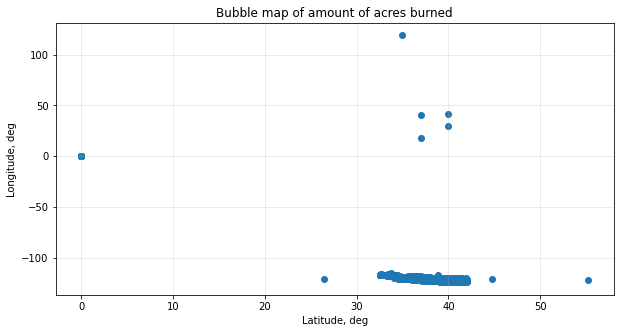

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(clean_data_1.Latitude, clean_data_1.Longitude)
# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")
plt.grid(alpha=0.3)

In [217]:
# Further, if we refer to known lat/lon ranges for california, we need to remove some of the existing
# non-California outliers
# from https://www.netstate.com/states/geography/ca_geography.html we have 
#      Longitude: 114° 8' W to 124° 24' W
#      Latitude: 32° 30' N to 42° N
clean_data_2 = clean_data_1[((clean_data_1['Latitude'] > 32) & (clean_data_1['Latitude'] < 42))]
clean_data_3 = clean_data_2[((clean_data_2['Longitude'] < -114) & (clean_data_2['Latitude'] > -124))]
print("Number of records after Latitude sorting\t" + str(clean_data_2.shape))
print("Number of records after Longitude sorting\t" + str(clean_data_3.shape))


Number of records after Latitude sorting	(1470, 40)
Number of records after Longitude sorting	(1465, 40)


No handles with labels found to put in legend.


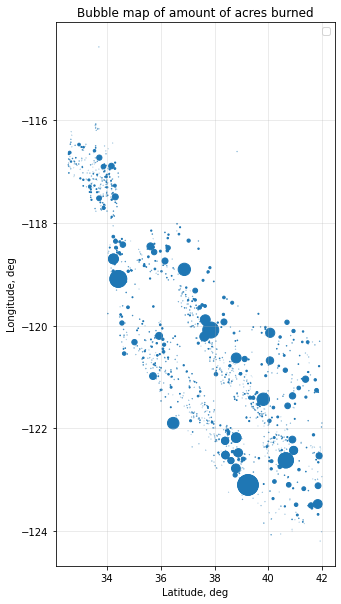

In [218]:
x = clean_data_3.Latitude
y = clean_data_3.Longitude

plt.figure(figsize=(5,10))
plt.scatter(x, 
            clean_data_3.Longitude, 
            s = clean_data_3.AcresBurned/1000, 
            c = 'tab:blue')
# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")
plt.legend()
plt.grid(alpha=0.3)

# for i, txt in enumerate(clean_data_3.Counties):
#     plt.annotate(txt, (clean_data_3.Latitude[i], clean_data_3.Longitude[i]))

In [219]:
clean_data_3.sort_values('AcresBurned', ascending=False)[['Name','Counties','Started','Extinguished','AcresBurned']].head(10)

,Name,Counties,Started,Extinguished,AcresBurned
1055,Ranch Fire (Mendocino Complex),Glenn,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
1056,Ranch Fire (Mendocino Complex),Lake,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
1057,Ranch Fire (Mendocino Complex),Mendocino,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
1054,Ranch Fire (Mendocino Complex),Colusa,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
616,Thomas Fire,Santa Barbara,2017-12-04T18:28:00Z,2019-03-14T11:24:00Z,281893.0
617,Thomas Fire,Ventura,2017-12-04T18:28:00Z,2019-03-14T11:24:00Z,281893.0
0,Rim Fire,Tuolumne,2013-08-17T15:25:00Z,2013-09-06T18:30:00Z,257314.0
1059,Carr Fire,Trinity,2018-07-23T13:15:00Z,2019-01-04T09:37:00Z,229651.0
1058,Carr Fire,Shasta,2018-07-23T13:15:00Z,2019-01-04T09:37:00Z,229651.0
1060,Camp Fire,Butte,2018-11-08T06:33:00Z,2018-11-25T08:00:00Z,153336.0


In [220]:
# for i, row in clean_data_3.iterrows():
#     row['TimeStarted'][i] = datetime.strptime(row['Started'][i],"%Y-%m-%d %H:%M:%S")
clean_data_3['TimeStarted'] = pd.to_datetime(clean_data_3['Started'])
clean_data_3['TimeExtinguished'] = pd.to_datetime(clean_data_3['Extinguished'])
clean_data_3.sort_values('AcresBurned', ascending=False)[['Name','Counties','Started','TimeStarted','Extinguished','TimeExtinguished','AcresBurned']].head(10)

<ipython-input-220-72ec82eefe04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_3['TimeStarted'] = pd.to_datetime(clean_data_3['Started'])
<ipython-input-220-72ec82eefe04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_3['TimeExtinguished'] = pd.to_datetime(clean_data_3['Extinguished'])


,Name,Counties,Started,TimeStarted,Extinguished,TimeExtinguished,AcresBurned
1055,Ranch Fire (Mendocino Complex),Glenn,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
1056,Ranch Fire (Mendocino Complex),Lake,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
1057,Ranch Fire (Mendocino Complex),Mendocino,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
1054,Ranch Fire (Mendocino Complex),Colusa,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
616,Thomas Fire,Santa Barbara,2017-12-04T18:28:00Z,2017-12-04 18:28:00+00:00,2019-03-14T11:24:00Z,2019-03-14 11:24:00+00:00,281893.0
617,Thomas Fire,Ventura,2017-12-04T18:28:00Z,2017-12-04 18:28:00+00:00,2019-03-14T11:24:00Z,2019-03-14 11:24:00+00:00,281893.0
0,Rim Fire,Tuolumne,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,2013-09-06T18:30:00Z,2013-09-06 18:30:00+00:00,257314.0
1059,Carr Fire,Trinity,2018-07-23T13:15:00Z,2018-07-23 13:15:00+00:00,2019-01-04T09:37:00Z,2019-01-04 09:37:00+00:00,229651.0
1058,Carr Fire,Shasta,2018-07-23T13:15:00Z,2018-07-23 13:15:00+00:00,2019-01-04T09:37:00Z,2019-01-04 09:37:00+00:00,229651.0
1060,Camp Fire,Butte,2018-11-08T06:33:00Z,2018-11-08 06:33:00+00:00,2018-11-25T08:00:00Z,2018-11-25 08:00:00+00:00,153336.0


In [252]:
clean_data_3['Duration'] = pd.to_(clean_data_3['TimeExtinguished'] - clean_data_3['TimeStarted']))
# print(f"{clean_data_3.Duration[1055]}, {float(clean_data_3.Duration[1055].days)}")

# clean_data_3['Duration'] = clean_data_3['AcresBurned']

# for i, row in clean_data_3.iterrows():
#     row['Duration'] = float((row['TimeExtinguished'] - row['TimeStarted']).days)
#     print("diff----------", row['TimeExtinguished'] - row['TimeStarted'])
#     print("  days--------", (row['TimeExtinguished'] - row['TimeStarted']).days)
#     print("    float-----", float((row['TimeExtinguished'] - row['TimeStarted']).days))

ValueError: invalid literal for int() with base 10: '0      20 days 03:05:00\n1       9 days 03:02:00\n2      15 days 04:17:00\n3      19 days 15:30:00\n5      63 days 22:00:00\n             ...       \n1631    0 days 06:03:00\n1632    0 days 02:29:56\

In [253]:
clean_data_3.sort_values('AcresBurned', ascending=False)[['Name','Counties','TimeStarted','TimeExtinguished', 'Duration','AcresBurned']]

,Name,Counties,TimeStarted,TimeExtinguished,Duration,AcresBurned
1055,Ranch Fire (Mendocino Complex),Glenn,2018-07-27 12:05:00+00:00,2019-01-04 09:33:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,410203.0
1056,Ranch Fire (Mendocino Complex),Lake,2018-07-27 12:05:00+00:00,2019-01-04 09:33:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,410203.0
1057,Ranch Fire (Mendocino Complex),Mendocino,2018-07-27 12:05:00+00:00,2019-01-04 09:33:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,410203.0
1054,Ranch Fire (Mendocino Complex),Colusa,2018-07-27 12:05:00+00:00,2019-01-04 09:33:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,410203.0
616,Thomas Fire,Santa Barbara,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,281893.0
...,...,...,...,...,...,...
278,Happy Camp Complex,Siskiyou,2014-08-11 22:00:00+00:00,2014-08-14 09:30:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,0.0
1053,Oroville Spillway,Butte,2017-02-07 14:00:00+00:00,2018-01-09 09:24:00+00:00,0 20 days 03:05:00\n1 9 days 03:02:...,0.0
1633,Cashe Fire,Yolo,2019-11-25 12:02:02+00:00,NaT,0 20 days 03:05:00\n1 9 days 03:02:...,NaN
1634,Oak Fire,San Diego,2019-10-22 19:20:44+00:00,NaT,0 20 days 03:05:00\n1 9 days 03:02:...,NaN


In [249]:
plt.scatter(clean_data_3.Latitude, int(str(clean_data_3.Duration)))

ValueError: invalid literal for int() with base 10: '0      20 days 03:05:00\n1       9 days 03:02:00\n2      15 days 04:17:00\n3      19 days 15:30:00\n5      63 days 22:00:00\n             ...       \n1631    0 days 06:03:00\n1632    0 days 02:29:56\

In [34]:
for item in clean_data_3.Location:
    print(item)

3 miles east of Groveland along Hwy 120
Angeles National Forest
Hwy 243 & Hwy 74 near Mountain Center
Deadwood Ridge, northeast of Foresthill
Seven miles north of Big Creek
Poppet Flats Rd near Hwy 243, south of Banning
North Fork of the Salmon River, West of Sawyers Bar, Klamath National Forest
Tish Tang Ridge east of Hoopa Valley Reservation
Near Deer Creek, 12 miles east of Los Molinos. 
Community of Igo, 10 miles southwest of Redding
off Sunrise Hwy, 9 miles southeast of Julian
140K3 Line, 8 miles northwest of Butte Meadows
South of Frazier Mountain Park Rd, South of Frazier Park
South of Frazier Mountain Park Rd, South of Frazier Park
The Geysers area, 10 miles northeast of Geyserville
Mias Canyon and Bluff Road in Banning
off Morgan Territory Road, Southeast of Clayton
San Felipe Road, north of Highway 78, East of Julian
southeast of Oroville
On Camp Pendleton, west of Fallbrook
Golden Trout Wilderness on the Sequoia National Forest.
Southeast of Lake Cachuma, approx. 12 miles so

southeast of Lee Vining, CA
Tick Canyon Rd and Summit Knoll Rd, Canyon Country
Northern ridge above Caples Creek north of Highway 88
Hagata Canyon, east of Eagle Lake
Highway 154 and E Camino Cielo near Painted Cave in the Los Padres National Forest
Lonoak Rd & Airline Hwy, East of King City  
Colyer Springs Rd and Raglin Ridge Rd, southwest of Red Bluff
Guinda
off Twisselmen Road, in the Kern National Wildlife Refuge,15 miles west of Delano
Off Highway 395 and Red Rock Road, North of Hallelujah Junction
Del Puerto Canyon Rd, east of Patterson  
Golden Trout Wilderness, Inyo National Forest
Tenaja Road and Clinton Keith Road, in La Cresta
Ash Creek and Highway 96, Southwest of Hornbrook
Highway 46 East and McMillan Canyon Road, North of Shandon
City of Tecate, southeast of San Diego 
North Butte Rd & West Butte Rd, northeast of Colusa
Chimney Rd and Barrel Springs Rd, 2 miles North of Sun Valley Nevada
off Highway 58 and Boulder Creek Road, California Valley
Cold Springs Rd and McDonal

### Source California County information from Wikipedia 
This is done to access listing of all teh counties, as well as their Population and Area data

In [10]:
# Read in list of California counties from Wikipedia
raw_california_counties = pd.read_html("https://en.wikipedia.org/wiki/List_of_counties_in_California")
len(raw_california_counties)

4

In [11]:
# Separating 2nd rendered table object on the page
raw_california_counties[1]
# List all available columns
raw_california_counties[1].columns

Index(['County', 'FIPS code[5]', 'County seat[6]', 'Est.[6]', 'Formed from',
       'Etymology[7]', 'General Law or Charter[8]',
       'Population (July 2019)[9]', 'Area[6]', 'Map'],
      dtype='object')

In [12]:
# Clean California counties data
clean_california_counties_1 = raw_california_counties[1]
clean_california_counties_1.head()

,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter,1671329,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law,1129,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law,39752,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter,219186,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law,45905,"1,020 sq mi(2,642 km2)",NaN


In [13]:
clean_california_counties_1.columns=['County', 'FIPS', 'Seat', 'Date_Established', 'FormedFrom',
       'Etymology', 'Law','Population_Jul_2019', 'Area', 'Map']
clean_california_counties_1.head()

,County,FIPS,Seat,Date_Established,FormedFrom,Etymology,Law,Population_Jul_2019,Area,Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter,1671329,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law,1129,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law,39752,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter,219186,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law,45905,"1,020 sq mi(2,642 km2)",NaN


In [14]:
clean_california_counties_2 = clean_california_counties_1[['County', 'Date_Established','Population_Jul_2019', 'Area']]
clean_california_counties_2.head()

,County,Date_Established,Population_Jul_2019,Area
0,Alameda County,1853,1671329,"738 sq mi(1,911 km2)"
1,Alpine County,1864,1129,"739 sq mi(1,914 km2)"
2,Amador County,1854,39752,"606 sq mi(1,570 km2)"
3,Butte County,1850,219186,"1,640 sq mi(4,248 km2)"
4,Calaveras County,1850,45905,"1,020 sq mi(2,642 km2)"


In [15]:
# Remove string "County" from the column "County"
clean_california_counties_2.County = clean_california_counties_2.County.str.replace(" County", "")
clean_california_counties_2.head()

C:\Users\troub\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,County,Date_Established,Population_Jul_2019,Area
0,Alameda,1853,1671329,"738 sq mi(1,911 km2)"
1,Alpine,1864,1129,"739 sq mi(1,914 km2)"
2,Amador,1854,39752,"606 sq mi(1,570 km2)"
3,Butte,1850,219186,"1,640 sq mi(4,248 km2)"
4,Calaveras,1850,45905,"1,020 sq mi(2,642 km2)"


In [16]:
# split area column into two for diferent units
clean_california_counties_2[["AreaSqMi", "AreaKm2"]] = clean_california_counties_2.Area.str.split("(",expand=True)
print(clean_california_counties_2.columns)
#       Drop old Area column
clean_california_counties_2 = clean_california_counties_2.drop(["Area"], axis=1)
clean_california_counties_2.head()

Index(['County', 'Date_Established', 'Population_Jul_2019', 'Area', 'AreaSqMi',
       'AreaKm2'],
      dtype='object')


C:\Users\troub\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
0,Alameda,1853,1671329,738 sq mi,"1,911 km2)"
1,Alpine,1864,1129,739 sq mi,"1,914 km2)"
2,Amador,1854,39752,606 sq mi,"1,570 km2)"
3,Butte,1850,219186,"1,640 sq mi","4,248 km2)"
4,Calaveras,1850,45905,"1,020 sq mi","2,642 km2)"


In [17]:
# Find which special characters are used for spaces in column header 
clean_california_counties_2.iloc[0,3]
clean_california_counties_2.iloc[0,4]

'1,911\xa0km2)'

In [18]:
# Remove unit references from data including using special '\xa0' combination for blank spaces
clean_california_counties_2.AreaSqMi = (clean_california_counties_2.AreaSqMi.str.replace("\xa0sq\xa0mi","",regex=False).str.replace(",","",regex=False)).astype('int64')
clean_california_counties_2.AreaKm2  = (clean_california_counties_2.AreaKm2.str.replace("\xa0km2)","", regex=False).str.replace(",","",regex=False)).astype('int64')
clean_california_counties_2.head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
0,Alameda,1853,1671329,738,1911
1,Alpine,1864,1129,739,1914
2,Amador,1854,39752,606,1570
3,Butte,1850,219186,1640,4248
4,Calaveras,1850,45905,1020,2642


In [19]:
clean_california_counties_2.describe(include='all')

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
count,58,58.000000,5.800000e+01,58.000000,58.000000
unique,58,NaN,NaN,NaN,NaN
top,San Diego,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1858.224138,6.812452e+05,2692.189655,6972.724138
std,NaN,13.972458,1.467932e+06,3102.397089,8035.121416
min,NaN,1850.000000,1.129000e+03,47.000000,122.000000
25%,NaN,1850.000000,4.804825e+04,960.000000,2486.250000
50%,NaN,1851.500000,1.870290e+05,1535.500000,3977.000000
75%,NaN,1860.000000,7.092760e+05,3462.250000,8967.000000


In [20]:
# Sort DF by population in descending order to view to 5 most populated counties
clean_california_counties_2.sort_values(['Population_Jul_2019'], ascending=False).head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
18,Los Angeles,1850,10039107,4060,10515
36,San Diego,1850,3338330,4204,10888
29,Orange,1889,3175692,948,2455
32,Riverside,1893,2470546,7208,18669
35,San Bernardino,1853,2180085,20062,51960


In [21]:
# Calculate population density per square mile 
clean_california_counties_2['PopDensityPerSqMi'] = clean_california_counties_2['Population_Jul_2019']
clean_california_counties_2['PopDensityPerSqMi'] = clean_california_counties_2.Population_Jul_2019/clean_california_counties_2.AreaSqMi

# Sort DF by population density in descending order to view to 5 most densly populated counties
clean_california_counties_2.sort_values(['PopDensityPerSqMi'], ascending=False).head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi
37,San Francisco,1850,881549,47,122,18756.361702
29,Orange,1889,3175692,948,2455,3349.886076
18,Los Angeles,1850,10039107,4060,10515,2472.686453
0,Alameda,1853,1671329,738,1911,2264.673442
40,San Mateo,1856,766573,449,1163,1707.289532


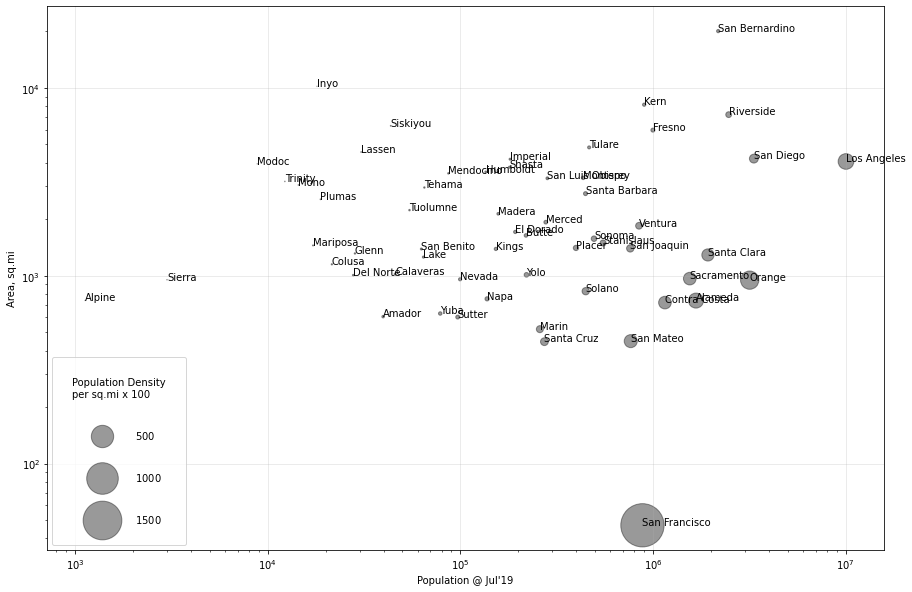

In [22]:
x = clean_california_counties_2.Population_Jul_2019
y = clean_california_counties_2.AreaSqMi
z = clean_california_counties_2.County
size = clean_california_counties_2.PopDensityPerSqMi/10

plt.figure(figsize=(15,10))
scatter = plt.scatter(x, y, s=size, alpha=0.4, c = "black")
# produce a legend with a cross section of sizes from the scatter

plt.xlabel("Population @ Jul'19")
plt.ylabel("Area, sq.mi")
plt.grid(alpha=0.3)
plt.xscale("log")
plt.yscale("log")
    
handles, labels = scatter.legend_elements("sizes", num=4)
legend = plt.legend(handles, labels, 
           loc = "lower left", 
           title = "Population Density\nper sq.mi x 100", 
           labelspacing = 3,
           handlelength=5,
           borderpad = 2)

for handle in legend.legendHandles:
    handle.set_color('blue')
    
for i, txt in enumerate(z):
    plt.annotate(txt, (x[i], y[i]))


In [23]:
# data from https://www.counties.org/data-and-research, 
# https://www.counties.org/sites/main/files/file-attachments/datapile_-_headline_datasets_-_current.xlsx

raw_california_coucus = pd.read_excel("./data/datapile_-_headline_datasets_-_current.xlsx", sheet_name="County & Government")
clean_california_caucus = raw_california_coucus[['County','Caucus']]
clean_california_caucus.head()

,County,Caucus
0,Alameda,Urban
1,Alpine,Rural
2,Amador,Rural
3,Butte,Suburban
4,Calaveras,Rural


In [24]:
# MErge counties data with caucus
clean_california_counties_merged = pd.merge(clean_california_counties_2, clean_california_caucus, on='County')
clean_california_counties_merged.head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi,Caucus
0,Alameda,1853,1671329,738,1911,2264.673442,Urban
1,Alpine,1864,1129,739,1914,1.527740,Rural
2,Amador,1854,39752,606,1570,65.597360,Rural
3,Butte,1850,219186,1640,4248,133.650000,Suburban
4,Calaveras,1850,45905,1020,2642,45.004902,Rural


In [25]:
clean_california_counties_merged.Caucus.unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

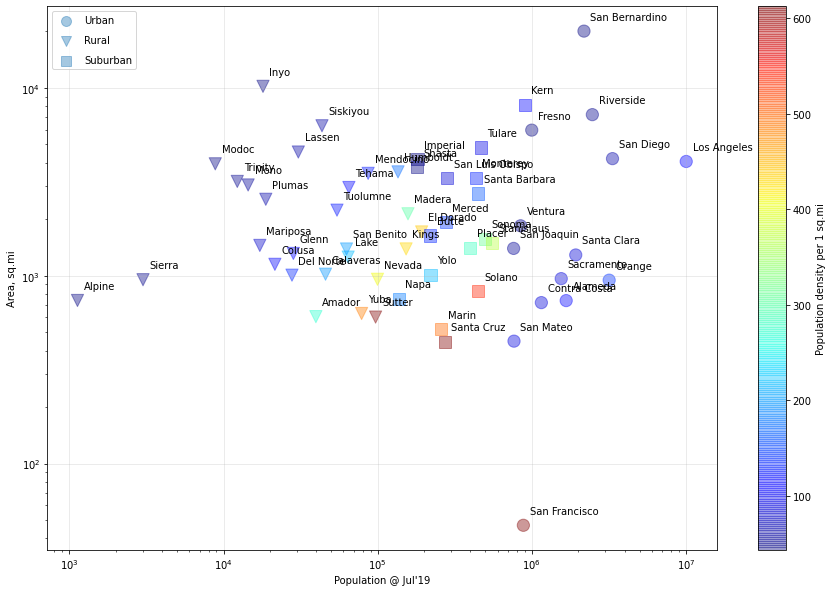

In [26]:
# Prep data for plotting input
x = clean_california_counties_2.Population_Jul_2019
y = clean_california_counties_2.AreaSqMi
counties = clean_california_counties_2.County

# Define variety of markers to be used 
shape = ["o", "v", "s"]

# Setup figure
plt.figure(figsize=(15,10))

i=0
# Run through each county type
for item in clean_california_counties_merged.Caucus.unique():
    # Extract data for specific county type     
    data = clean_california_counties_merged[clean_california_counties_merged['Caucus'] == item]
    
    # redefine subsets for coordinates     
    x_sub = data.Population_Jul_2019
    y_sub = data.AreaSqMi
    counties_sub = data.County
    
    plt.scatter(x_sub, y_sub, 
        s = 150,
        c = data.PopDensityPerSqMi,
        cmap = 'jet',
        marker = shape[i],
        alpha = 0.4, 
        label = item 
        )
    i+=1
# Set up, label and view colorbar
cbar = plt.colorbar()
cbar.set_label('Population density per 1 sq.mi')

#  Set up X, Y axes labels    
plt.xlabel("Population @ Jul'19")
plt.ylabel("Area, sq.mi")

#  Set up legend
legend = plt.legend(loc="upper left", fontsize=10, labelspacing=1)

# change the marker size manually to amke the same
for handle in legend.legendHandles:
    handle.set_sizes([100.0])

# view grid and set transparency to 30%
plt.grid(alpha=0.3)

# Change both x and y scales to logarithmic
plt.xscale("log")
plt.yscale("log")



for i, txt in enumerate(counties):
    plt.annotate(txt, (x[i]*1.1, y[i]*1.15), fontsize = 10)

In [36]:
# 
raw_land_use = pd.read_excel("./data/datapile_-_headline_datasets_-_current.xlsx", sheet_name="County Profile")
raw_land_use.head()

,County,Gross Domestic Product (2018),GDP Change from Previous Year,Residential Building Permits: Single-Unit - Number (2018),Residential Building Permits: Single Unit - Value (2018),Residential Building Permits: Multi-Unit - # of Units (2018),Residential Building Permits: Multi-Unit - Value (2018),Housing Units: Single Family (January 2019),Housing Units: Multi-Family (January 2019),Housing Units: Mobile Homes (January 2019),...,Registered Trailers (2018),Registered Motorcycles (2018),Violent Crimes (2018),Property Crimes (2018),Farms (August 2018),Ag: Planted Acres (August 2018),Ag: Volunteer Acres (August 2018),Ag: Failed Acres (August 2018),Ag: Prevented Acres (August 2018),Ag: Not Planted Acres (August 2018)
0,Alameda,144494091000,0.039,1965,682283505,6091,1352542307,365797,232321,7859,...,53443,32840,9948,58856,271,165009.15,107.46,0.0,0.00,0.00
1,Alpine,230220000,0.090,4,1256629,0,0,1073,676,34,...,433,71,12,29,10,77811.63,0.00,0.0,0.00,0.00
2,Amador,1864239000,0.039,172,40249994,0,0,15545,1310,1423,...,10862,2169,118,596,238,192891.71,3.22,0.0,0.00,0.00
3,Butte,10332996000,0.024,595,128664970,108,12499351,55404,19294,10749,...,44843,7095,1214,5824,568,199970.87,4641.91,0.0,138.47,219.64
4,Calaveras,1642450000,-0.008,112,29518251,0,0,24871,1068,2271,...,15739,3031,197,860,222,240243.30,7085.02,0.0,0.00,0.00


In [58]:
for i in clean_data_3.Counties.unique():
    print(i)

Tuolumne
Los Angeles
Riverside
Placer
Fresno
Siskiyou
Humboldt
Tehama
Shasta
San Diego
Kern
Ventura
Sonoma
Contra Costa
Butte
Tulare
Santa Barbara
Mariposa
El Dorado
San Bernardino
Plumas
Modoc
San Luis Obispo
Madera
Inyo
Napa
San Benito
San Joaquin
Alameda
Glenn
Yolo
Sacramento
Stanislaus
Solano
Merced
Lake
Monterey
Mendocino
Lassen
Amador
Yuba
Nevada
Santa Clara
Calaveras
San Mateo
Orange
Colusa
Trinity
Alpine
Mono
Sutter
Del Norte
Kings
Sierra
Santa Cruz
Marin
Mexico
State of Nevada
